In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import models, layers
print(os.listdir('../data/raw/'))
imdb_data=pd.read_csv('../data/raw/IMDB Dataset.csv')
imdb_data.head(5)


['data_full.json', 'IMDB Dataset.csv', 'intents.json', 'intent_analysis_ds.csv', 'RAMAYANA.txt', 'ramayan_data_dict.json', 'sentiment_train_Final.csv', 'Sen_Type_Class_ds_Final.csv', 'train_sentiment_FINAL.csv', 'user_text_categories.xlsx']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
from sklearn.preprocessing import LabelEncoder
imdb_data.shape
imdb_data.describe()
le = LabelEncoder()
imdb_data['seintiment_target'] = le.fit_transform(imdb_data.sentiment)
imdb_data.head(5)

,review,sentiment,seintiment_target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [18]:
imdb_data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

(37500,) (37500,)
(12500,) (12500,)


C:\Users\bijay\AppData\Local\Temp\ipykernel_10740\3179988128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',  data=imdb_data , palette = "Set2")


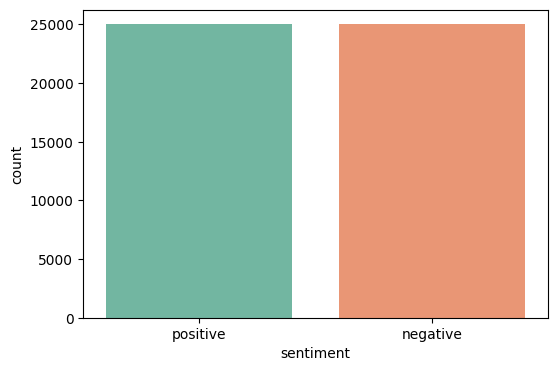

In [49]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
y_train.head(5)
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',  data=imdb_data , palette = "Set2")
plt.show()

In [54]:
import nltk
stopword_list=nltk.corpus.stopwords.words('english')
keras_token = Tokenizer(num_words=10000)
keras_token.fit_on_texts(imdb_data.review)
len(keras_token.word_index)

124252

In [61]:
keras_result = keras_token.texts_to_sequences(imdb_data.review)
keras_pad_result = pad_sequences(keras_result, maxlen=500, padding='post')
type(keras_pad_result)
keras_pad_result[2]

array([  10,  190,   11,   13,    3,  393,   95,    5, 1155,   55,   20,
          3,   96,  879, 1494, 2657, 1241,    8,    1,  903,  769,    2,
        147,    3,  649, 2333,  202,    1,  111,    6, 4086,   18,    1,
        410,    6, 1915,    2,    1,  102,   23, 1485,   57,    1,   69,
       6126, 6686, 1574,  494,  136,   47,  200,   26,  680,   50,   33,
        959,   11,    6,   21, 1026,  220,  230, 2917, 5196,   10,  190,
          9,   13, 3059,   12, 2971, 2050,    6,  130, 1403,    8, 1139,
          4,    1,  396,  106,    4,  176,   25, 2079,    5,  112,    7,
          7,   11,   13,    1,   88,  482, 1451,   30,   27,    4, 1317,
          8,  153, 3024,   10,  131,    3, 2121,  136,  198,  110,   75,
       1508,   16, 8927,    8,   11,   59, 1323,    5, 1260,  175,   40,
       1257, 1428,    2, 5078,  203,   82,    3,  848,   18, 3611,  186,
        257,    7,    7,   11,  200,   21,   26,    1, 7241, 5176,    4,
         24,  628,   18,    9,   13,   71, 2244, 29

X_train, X_test,y_train, y_test = train_test_split(keras_pad_result,imdb_data['seintiment_target'] , random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

(37500, 500) (37500,)
(12500, 500) (12500,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>

In [68]:
X_train, X_test,y_train, y_test = train_test_split(keras_pad_result,imdb_data['seintiment_target'].values , random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(type(y_train))
print(type(X_train))

(37500, 500) (37500,)
(12500, 500) (12500,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [77]:
model = models.Sequential()
model.add(layers.Embedding(10000, 50, input_length=500))
model.add(layers.Conv1D(24, 8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool1D(3))
model.add(layers.Conv1D(16, 8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Bidirectional(layers.LSTM(24, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Bidirectional(layers.LSTM(12, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=1, validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 50)           500000    
                                                                 
 conv1d_14 (Conv1D)          (None, 493, 24)           9624      
                                                                 
 dropout_21 (Dropout)        (None, 493, 24)           0         
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 164, 24)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 157, 16)           3088      
                                                                 
 dropout_22 (Dropout)        (None, 157, 16)           0         
                                                      

In [ ]:
import random
idx_test = random.randint(0, 9)
idx_original = X_test[idx_test]
#print("-->" ,imdb_data.iloc[idx_original])
# (actual_rev, actual_sent) = imdb_data.iloc[idx_original]
prediction = model.predict(keras_pad_result)[idx_test][0]
prediction_sent = 'positive' if prediction >= 0.5 else 'negative'
probability = round(prediction if prediction >= 0.5 else 1-prediction, 2)
# # Printing the original review, its predicted sentiment and probability, and original sentiment
print(imdb_data.iloc[5])
(actual_rev,actual_sent) = imdb_data.iloc[5]
print('\033[1m' + 'Review :' % idx_original + '\033[0m' + '\n', actual_rev, '\n')
print('\033[1m' + 'Predicted sentiment:' + '\033[0m', prediction_sent, '(with probability %.2f)' % probability, '\n')
print('\033[1m' + 'Actual sentiment:' + '\033[0m', actual_sent)

1176/1563 [=====================>........] - ETA: 18s